## Homework Reinforcement Learning

<img src="FrozenLake.png" alt="Kitten"
	title="A cute kitten" width="600" height="300" />

Deze taak bevat 3 opgaven waarbij je telkens de aangeleverde code aanvult, het resultaat ervan toont en bespreekt.
De puntenverdeling is als volgt :



|  Oefening   | #punten | 
|-----------|:--------:|
|  oef1 :  |     /3   |  
|  oef2 : |     /4   |  
|  oef3 : |     /3  |     
|      Totaal: |     /10    | 


### Praktische afspraken :
Dit project wordt ingediend door deze notebook verder af te werken en te uploaden naar Toledo voor de start van je laatste labo in **de week van maandag 17 janauri 2022**

#### Alvast veel succes!



### Oefening 1 : Agent en Environment
Definieer een klasse *Environment* en een klasse *Agent*. De omgeving is deterministisch en bevat 
onderstaande toestanden en acties (zie; https://reinforcement-learning4.fun/2019/06/09/introduction-reinforcement-learning-frozen-lake-example/).

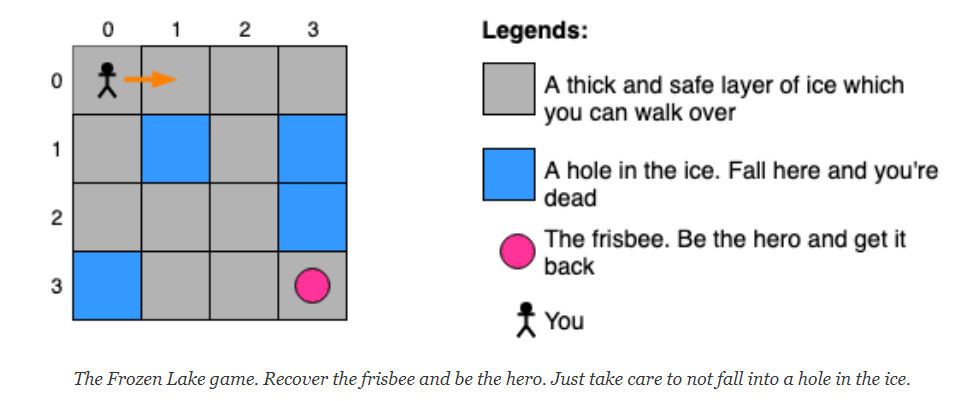


In de __Environment klasse__ voorzie je volgende velden en methoden :

- een veld _states_ dat de toestanden van de omgeving bijhoudt
- een veld _actions_ dat de mogelijke acties in elke toestand weergeeft
- een veld _current_state_ die initieel de start state van de omgeving bevat
- een veld _game_ waarin de rewards van de FrozenLake game wordt bijgehouden
- een methode _do_step_ die gegeven een toestand en actie de volgende toestand en reward teruggeeft als resultaat.               
- een methode _is_end_episode_ die aangeeft of de omgeving zich in een eindtoestand bevindt
- een methode _reset_ die de omgeving terug in zijn start_toestand brengt
       
In de __Agent klasse__ voorzie je volgende velden en methoden :

- velden om een $total\_reward$ bij te houden en een $episode\_reward$. Initialiseer beide op 0
- een veld om het aantal $steps$ bij te houden in de huidige episode
- een methode $select\_action$ die gegeven de huidige toestand van de omgeving een nieuwe actie selecteert en deze ook teruggeeft. In deze versie van de agent zal je de actie gewoon random genereren. 
- een methode $step$ die gegeven een omgeving en een actie, deze actie laat uitvoeren in de omgeving. De verkregen immediate reward tel je bij de total\_reward. 
- een methode $clear\_episode$ om de velden te herinitialiseren bij de start van een nieuwe episode

Schrijf nu een programma waarin je de omgeving en een agent aanmaakt en je laat deze random een aantal episodes uitvoeren. 
Print telkens uit hoeveel __reward er per episode__ vergaard werd, alsook hoeveel __reward er gemiddeld__ verzameld werd per episode?

Maak nu gebruik van __een discount factor $\gamma$__ om je reward te berekenen (maak een extra data veld in de klasse agent aan). 
$Reward_t = r_{t+1} + \gamma r_{t+2} + \gamma^2 r_{t+3} + \ldots = \Sigma_{k=0}^\infty \gamma^k r_{t+k+1}$
Een pad waarbij de oplossing sneller bereikt wordt is immers te prefereren.


In [1]:
#Define agent and Environment, make random steps, collect reward
import random
#src: https://github.com/PacktWorkshops/The-Reinforcement-Learning-Workshop/blob/04e8c72bc9e46d66846b748c074b26a1b724fae0/Chapter01/Exercise1.01/Exercise01_01.ipynb


class Environment:
    def __init__(self):
        self.states = list(range(0,16))
        self.actions = ['up', 'down', 'left', 'right']
        self.current_state = 0
        self.game = {(0,'up'):(0,0), (0,'left') : (0,0), (0,'down') : (4,0), (0,'right') : (1,0),
                     (1,'up'):(1,0), (1,'left') : (0,0), (1,'down') : (5,-10), (1,'right') : (2,0),
                     (2,'up'):(2,0), (2,'left') : (1,0), (2,'down') : (6,0), (2,'right') : (3,0),
                     (3,'up'):(3,0), (3,'left') : (2,0), (3,'down') : (7,-10), (3,'right') : (3,0),
                     (4,'up'):(0,0), (4,'left') : (4,0), (4,'down') : (8,0), (4,'right') : (5,-10),
                     (6,'up'):(2,0), (6,'left') : (5,-10), (6,'down') : (10,0), (6,'right') : (7,-10),
                     (8,'up'):(4,0), (8,'left') : (8,0), (8,'down') : (12,-10), (8,'right') : (9,0),
                     (9,'up'):(5,-10), (9,'left') : (8,0), (9,'down') : (13,0), (9,'right') : (10,0),
                     (10,'up'):(6,0), (10,'left') : (9,0), (10,'down') : (14,0), (10,'right') : (11,-10),
                     (13,'up'):(9,0), (13,'left') : (12,-10), (13,'down') : (13,0), (13,'right') : (14,0),
                     (14,'up'):(10,0), (14,'left') : (13,0), (14,'down') : (14,0), (14,'right') : (15,10)}
            
    def get_actions(self):
        return self.actions
      
    def get_current_state(self):
        return self.current_state
       
    def is_end_episode(self):
        endpoints = [5, 7, 11, 12, 15]
        return self.current_state in endpoints

    def do_step(self, action):
        next_state, reward = self.game[(self.current_state, action)]
        self.current_state = next_state
        return reward
    
    def reset(self):
        self.current_state = 0
        

class Agent:
    def __init__(self):    
        self.total_reward = 0
        self.episode_reward = 0
        self.amount_of_steps = 0
        
    def select_action(self, env):
        return random.choice(env.actions)
       
    def step(self, env):
        self.amount_of_steps += 1
        
        action = self.select_action(env)
        reward = env.do_step(action)
        print("Huidige actie:", action)
        self.episode_reward += reward
        
    def clear_episode(self):
        self.total_reward += self.episode_reward
        self.episode_reward = 0
        self.amount_of_steps = 0

In [25]:
# Schrijf hier een programma waarin je de omgeving en een agent aanmaakt en je laat deze random een aantal episodes uitvoeren. 
# Print telkens uit hoeveel __reward er per episode__ vergaard werd, alsook hoeveel __reward er gemiddeld__ verzameld werd per episode?

env = Environment()
agent = Agent()
iterations = 100
win_count = 0
lose_count = 0

for action in range(iterations):
    print("Iteratie:", action)
    while not env.is_end_episode():
        agent.step(env)
        print(f"Huidige state: {env.current_state}, reward: {agent.episode_reward}") #From state {agent} to state {next_state} with action 
    print("eind: ", agent.episode_reward)
    
    if (agent.episode_reward == 10):
        win_count += 1
        print("De agent heeft het spel gewonnen!!")
    else:
        lose_count += 1
    
    env.reset()
    agent.clear_episode()
    
print("Gemiddelde voor alle episodes:", agent.total_reward / iterations)
print(f"Aantal gewonnen games: {win_count}, verloren games: {lose_count} op {iterations} games")

Iteratie: 0
Huidige actie: right
Huidige state: 1, reward: 0
Huidige actie: left
Huidige state: 0, reward: 0
Huidige actie: right
Huidige state: 1, reward: 0
Huidige actie: right
Huidige state: 2, reward: 0
Huidige actie: down
Huidige state: 6, reward: 0
Huidige actie: left
Huidige state: 5, reward: -10
eind:  -10
Iteratie: 1
Huidige actie: down
Huidige state: 4, reward: 0
Huidige actie: left
Huidige state: 4, reward: 0
Huidige actie: left
Huidige state: 4, reward: 0
Huidige actie: right
Huidige state: 5, reward: -10
eind:  -10
Iteratie: 2
Huidige actie: up
Huidige state: 0, reward: 0
Huidige actie: left
Huidige state: 0, reward: 0
Huidige actie: right
Huidige state: 1, reward: 0
Huidige actie: down
Huidige state: 5, reward: -10
eind:  -10
Iteratie: 3
Huidige actie: down
Huidige state: 4, reward: 0
Huidige actie: down
Huidige state: 8, reward: 0
Huidige actie: up
Huidige state: 4, reward: 0
Huidige actie: up
Huidige state: 0, reward: 0
Huidige actie: down
Huidige state: 4, reward: 0
Hu

Huidige actie: up
Huidige state: 0, reward: 0
Huidige actie: up
Huidige state: 0, reward: 0
Huidige actie: left
Huidige state: 0, reward: 0
Huidige actie: up
Huidige state: 0, reward: 0
Huidige actie: left
Huidige state: 0, reward: 0
Huidige actie: down
Huidige state: 4, reward: 0
Huidige actie: right
Huidige state: 5, reward: -10
eind:  -10
Iteratie: 62
Huidige actie: left
Huidige state: 0, reward: 0
Huidige actie: up
Huidige state: 0, reward: 0
Huidige actie: left
Huidige state: 0, reward: 0
Huidige actie: down
Huidige state: 4, reward: 0
Huidige actie: down
Huidige state: 8, reward: 0
Huidige actie: right
Huidige state: 9, reward: 0
Huidige actie: left
Huidige state: 8, reward: 0
Huidige actie: right
Huidige state: 9, reward: 0
Huidige actie: left
Huidige state: 8, reward: 0
Huidige actie: left
Huidige state: 8, reward: 0
Huidige actie: left
Huidige state: 8, reward: 0
Huidige actie: down
Huidige state: 12, reward: -10
eind:  -10
Iteratie: 63
Huidige actie: right
Huidige state: 1, r

Iteratie: 93
Huidige actie: down
Huidige state: 4, reward: 0
Huidige actie: down
Huidige state: 8, reward: 0
Huidige actie: up
Huidige state: 4, reward: 0
Huidige actie: up
Huidige state: 0, reward: 0
Huidige actie: left
Huidige state: 0, reward: 0
Huidige actie: down
Huidige state: 4, reward: 0
Huidige actie: left
Huidige state: 4, reward: 0
Huidige actie: left
Huidige state: 4, reward: 0
Huidige actie: up
Huidige state: 0, reward: 0
Huidige actie: right
Huidige state: 1, reward: 0
Huidige actie: down
Huidige state: 5, reward: -10
eind:  -10
Iteratie: 94
Huidige actie: left
Huidige state: 0, reward: 0
Huidige actie: right
Huidige state: 1, reward: 0
Huidige actie: up
Huidige state: 1, reward: 0
Huidige actie: right
Huidige state: 2, reward: 0
Huidige actie: down
Huidige state: 6, reward: 0
Huidige actie: left
Huidige state: 5, reward: -10
eind:  -10
Iteratie: 95
Huidige actie: down
Huidige state: 4, reward: 0
Huidige actie: down
Huidige state: 8, reward: 0
Huidige actie: down
Huidige 

### Oefening 2 : Q-learning

Wanneer de actie-selectie random gebeurt zie je vast geen evolutie of verbetering in de episodes. De bedoeling is nu dat de agent via het __Q-learning algoritme__ leert om de juiste acties te nemen in de omgeving. De verschillende stappen in het Q-learning algoritme gaan als volgt :

1. Initialiseer een $Q-table$ : elk state-action pair krijgt initieel waarde 0
2. Implementeer de episolon-greedy actie selectie strategie
3. Voer de gekozen actie $a$ uit in toestand $s$ en observeer de nieuwe state $s_{new}$ en de immediate reward $r$
4. Gebruik bovenstaande ervaring om de Q-value Q(s,a) te updaten :

   $ Q(s,a) \leftarrow  Q(s,a) + \alpha (r + \gamma max_bQ(s_{new},b) - Q(s,a)) $

5. Herhaal stap 3,4,5 nu voor toestand $s_{new}$ totdat een eindtoestand bereikt wordt
6. Herhaal bovenstaande stappen 3,4,5 voor voldoende aantal episodes


Pas je bovenstaande klasse Agent aan zodat de agent nu leert via Q-learning:  

 - Voorzie een extra veld om $Q$-values bij te houden. Dit kan eenvoudig aan de hand van een dictionary waarbij de key een state-actie paar is
 - Implementeer de $\epsilon\_greedy$ actie-selectie methode (de $random.choice$ methode van $numpy$ kan hier best handig zijn)
 - Hoe goed is de policy die je afleidt uit de Q-values (pure exploitatie) op het einde van het trainen ? 
 - Varieer met volgende parameters en geef aan of er een effect is op het leren :
     - aantal episodes
     - learning rate $\alpha$
     - discount factor $\gamma$   
     - Gebruik een soft-max actie selectie waarbij de kans op het selecteren van actie a gegeven wordt door :  $p(a) = \frac{e^{Q_t(a) / \tau}}{\sum_{b=1}^n e^{Q_t(b) / \tau}}$. Hierbij is $\tau$ een positieve waarde die een temperatuur voorstelt. Een hoge temperatuur maakt de acties gelijkwaardig, een lage temperatuur bevoordeelt acties die een hoge $Q$-value hebben.
         

In [3]:
#voorbeeldcode om Q-values bij te houden
from collections import defaultdict
import numpy as np

values =  defaultdict(float)
actions = ['up', 'down','left','right']
state = 1
values[(1,"left")] = 13
values[(1,"up")] = 7
print(values[(1,"left")])

13


In [28]:
# Q-learning

class AgentQ:
    
    def __init__(self):
        self.total_reward = 0
        self.episode_reward = 0
        self.gamma = 0.85
        self.alpha = 0.5
        self.epsilon = 0.9
        self.threshold = -4
        self.increment = 0.12
        self.steps = 1
        self.episodes = 1
        self.qvalues = defaultdict(float)
        
    def select_epsilon_greedy_action(self, env, state):
        if np.random.rand() <= self.epsilon:
            return random.choice(env.get_actions())
        return self.select_greedy_action(env, state)
    
    def select_greedy_action(self, env, state):
        q_values = np.array([self.qvalues[(state, a)] for a in env.get_actions()])
        return actions[np.argmax(q_values)]
        
    def select_softmax_action(self, env, state):
        actions = env.get_actions()
        q_values = np.array([self.qvalues[(state, a)] for a in actions]) / 1
        prob_vector = np.exp(q_values) / np.sum(np.exp(q_values))
        return np.random.choice(actions, p=prob_vector)
        
    def step(self, env):
        state = env.get_current_state()
        actions = env.get_actions()
        q_values = [self.qvalues[state, a] for a in actions]
        
        action = self.select_softmax_action(env, state)
        best_action = self.select_greedy_action(env, state)
        new_reward = env.do_step(action)
        
        qvalue_future = self.qvalues[(state, actions.index(best_action))]
        qvalue_current = self.qvalues[(state, actions.index(action))]
        
        self.qvalues[(state, action)] = (self.alpha + qvalue_current) * (new_reward + self.gamma * qvalue_future - qvalue_current)

        self.steps += 1
        self.episode_reward += new_reward * (self.gamma ** self.steps)
        
    def clear_episode(self):
        if self.epsilon > 0 and self.episode_reward >= self.threshold:
            self.threshold += self.increment
            self.epsilon -= 0.1 
        self.total_reward += self.episode_reward
        self.episode_reward = 0
        self.steps = 0
        self.episodes = 1

In [29]:
# Schrijf nu een programma waarin je de omgeving en een agent aanmaakt en je laat deze random een aantal episodes uitvoeren. 
# Print telkens uit hoeveel __reward er per episode__ vergaard werd, alsook hoeveel __reward er gemiddeld__ verzameld werd per episode?
# Hoe goed is de policy die je afleidt uit de Q-values (pure exploitatie) op het einde van het trainen ? 

#import pprint

env = Environment()
agentQ = AgentQ()

iterations = 100
win_count = 0
lose_count = 0

for action in range(iterations):
    print("Iteratie:", action)
    while not env.is_end_episode():
        agentQ.step(env)
        print(f"Huidige state: {env.current_state}, reward: {agentQ.episode_reward}") #From state {agent} to state {next_state} with action 
    
    print("total reward: ", agentQ.total_reward)
    
    if env.current_state == 15: # Gewonnen
        win_count += 1
    else:
        lose_count += 1
    env.reset()
    agentQ.clear_episode()
    #pprint.pprint(agentQ.qvalues)

print("Gemiddelde voor alle episodes:", agentQ.total_reward / iterations)
print(f"Aantal gewonnen games: {win_count}, verloren games: {lose_count} op {iterations} games")

Iteratie: 0
Huidige state: 0, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 1, reward: 0.0
Huidige state: 1, reward: 0.0
Huidige state: 5, reward: -3.2057708828124993
total reward:  0
Iteratie: 1
Huidige state: 0, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 1, reward: 0.0
Huidige state: 1, reward: 0.0
Huidige state: 1, reward: 0.0
Huidige state: 1, reward: 0.0
Huidige state: 1, reward: 0.0
Huidige state: 1, reward: 0.0
Huidige state: 1, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 12, reward: -0.6311342330065433
total reward:  -3.2057708828124993
Iteratie: 2
Huidige state: 0, reward: 0.0
Huidige state: 1, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige s

Huidige state: 15, reward: 0.00018666720418275245
total reward:  -6.524132160078816
Iteratie: 23
Huidige state: 0, reward: 0.0
Huidige state: 1, reward: 0.0
Huidige state: 2, reward: 0.0
Huidige state: 2, reward: 0.0
Huidige state: 6, reward: 0.0
Huidige state: 10, reward: 0.0
Huidige state: 9, reward: 0.0
Huidige state: 13, reward: 0.0
Huidige state: 13, reward: 0.0
Huidige state: 9, reward: 0.0
Huidige state: 10, reward: 0.0
Huidige state: 9, reward: 0.0
Huidige state: 13, reward: 0.0
Huidige state: 14, reward: 0.0
Huidige state: 15, reward: 0.8735421910125167
total reward:  -6.523945492874633
Iteratie: 24
Huidige state: 0, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 8, reward

Huidige state: 3, reward: 0.0
Huidige state: 2, reward: 0.0
Huidige state: 6, reward: 0.0
Huidige state: 10, reward: 0.0
Huidige state: 6, reward: 0.0
Huidige state: 10, reward: 0.0
Huidige state: 6, reward: 0.0
Huidige state: 10, reward: 0.0
Huidige state: 14, reward: 0.0
Huidige state: 15, reward: 0.0648614565557106
total reward:  1.4898014027291753
Iteratie: 37
Huidige state: 0, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 1, reward: 0.0
Huidige state: 2, reward: 0.0
Huidige state: 2, reward: 0.0
Huidige state: 2, reward: 0.0
Huidige state: 2, reward: 0.0
Huidige state: 1, reward: 0.0
Huidige state: 2, reward: 0.0
Huidige state: 3, reward: 0.0
Huidige state: 3, reward: 0.0
Huidige state: 3, reward: 0.0
Huidige state: 3, reward: 0.0
Huidige state: 3, reward: 0.0
Huidige state: 3, reward: 0.0
Huidige state: 3, reward: 0.0
Huidige state: 2, reward: 0.0
Huidige state: 6, reward: 0.0
Huidige state: 2, reward: 0.0
Huidige state: 6, reward: 0.0
Hui

Huidige state: 1, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 1, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 1, reward: 0.0
Huidige state: 2, reward: 0.0
Huidige state: 3, reward: 0.0
Huidige state: 2, reward: 0.0
Huidige state: 1, reward: 0.0
Huidige st

Huidige state: 0, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 9, reward: 0.0
Huidige state: 10, reward: 0.0
Huidige state: 9, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 9, reward: 0.0
Huidige state: 13, reward: 0.0
Huidige state: 13, reward: 0.0
Huidige state: 14, reward: 0.0
Huidige state: 15, reward: 0.01276956062407718
total reward:  9.48

Huidige state: 6, reward: 0.0
Huidige state: 10, reward: 0.0
Huidige state: 6, reward: 0.0
Huidige state: 10, reward: 0.0
Huidige state: 9, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 9, reward: 0.0
Huidige state: 13, reward: 0.0
Huidige state: 13, reward: 0.0
Huidige state: 13, reward: 0.0
Huidige state: 14, reward: 0.0
Huidige state: 15, reward: 0.0015439100298717703
total reward:  11.473728367510239
Iteratie: 71
Huidige state: 0, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 9, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 9, reward: 0.0
Huidige state: 13, reward: 0.0
Huidige state: 13, reward: 0.0
Huidige state: 14, reward: 0.0
Huidige state: 15, reward: 1.673432436896142
total reward:  11.47527227754011
Iteratie: 72
Huidige state: 4, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 0, reward: 0.0
Huidige state: 0, reward

Huidige state: 0, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 4, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 9, reward: 0.0
Huidige state: 10, reward: 0.0
Huidige state: 14, reward: 0.0
Huidige state: 15, reward: 0.0009481537470950009
total reward:  18.871480339326503
Iteratie: 87
Huidige state: 4, reward: 0.0
Huidige state: 8, reward: 0.0
Huidige state: 9, reward: 0.0
Huidige state: 10, reward: 0.0
Huidige state: 6, reward: 0.0
Huidige state: 10, reward: 0.0
Huidige state: 9, reward: 0.0
Huidige state: 10, reward: 0.0
Huidige state: 6, reward: 0.0
Huidige state: 2, reward: 0.0
Huidige state: 2, reward: 0.0
Huidige state: 6, reward: 0.0
Huidige state: 10, reward: 0.0
Huidige state: 6, reward: 0.0
Huidige state: 10, reward: 0.0
Huidige state: 9, reward: 0.0
Huidige state: 10, reward: 0.0
Huidige state: 6, reward: 0.0
Huidige state: 10, reward: 0.0
Huidige state: 14, reward: 0.0
Huidige state: 15, reward: 0.3294560142183718
total re

### Oefening 3 : Deep-Q-learning

Het leren van tabulaire $Q$_values kent uiteraard zijn grenzen. Daarom is het interessant om een een deep neuraal network de $Q-functie$ te laten leren. Dit kan via het  __Deep Q-learning algoritme (DQN) __  .

https://markus-x-buchholz.medium.com/deep-reinforcement-learning-introduction-deep-q-network-dqn-algorithm-fb74bf4d6862

In onderstaande cellen vind je de implementatie van een DQL Agent. Deze maakt tijdens het leren gebruik van 2 verschillende Q — networks ($Q\_network\_local$ en $Q\_network\_target$) om enerzijds een voorspelling van te maken van de Q-value in een toestand $Q(s,a, \theta)$ en anderzijds een voorspelling te maken van de target $r + \gamma max_b Q(s_{next\_state}, b, \theta^{'})$ 

zodat volgende loss functie gebruikt kan worden om de gewichten van het $Q\_network\_local$ te updaten :

   $ Loss = (r + \gamma max_b Q(s_{next\_state}, b, \theta^{'}) - Q(s,a,\theta))^2 $

Het target network wordt niet onmidellijk geupdatetet maar krijgt nu een dan een copy van de gewichten van het local network. Dit om stailiteitsredenen.

De omgeving ontlenen we hier aan de gym library : https://reinforcement-learning4.fun/2019/06/16/gym-tutorial-frozen-lake/
Deze bevat eveneens een implementatie van onze frozen lake omgeving : https://reinforcement-learning4.fun/2019/06/09/introduction-reinforcement-learning-frozen-lake-example/ Merk op, de omgeving is deterministisch als je de property $is\_slippery=False$.

Vervolledig deze code door een gebruikersprogramma toe te voegen dat enerzijds het netwerk traint en anderzijds het netwerk gebruikt om te testen hoe goed het presteert op het Frozen Lake probleem. Hoeveel keer kan je gemiddeld de Goal-state bereiken na het leren van het netwerk?

In [17]:
import numpy as np
import random
from IPython.display import clear_output
from collections import deque

import gym

import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Embedding, Reshape
from tensorflow.keras.optimizers import Adam

In [18]:
enviroment = gym.make("FrozenLake-v1", is_slippery=False).env
enviroment.render()

print('Number of states: {}'.format(enviroment.observation_space.n))
print('Number of actions: {}'.format(enviroment.action_space.n))


SFFF
FHFH
FFFH
HFFG
Number of states: 16
Number of actions: 4


In [19]:
state = enviroment.reset()
state = np.reshape(state, [1, 1])
print(state)

[[0]]


In [20]:
class AgentDeepQ:
    def __init__(self, enviroment, optimizer):
        
        # Initialize atributes
        self._state_size = enviroment.observation_space.n
        self._action_size = enviroment.action_space.n
        self._optimizer = optimizer
        
        self.expirience_replay = deque(maxlen=2000)
        
        # Initialize discount and exploration rate
        self.gamma = 0.6
        self.epsilon = 0.1
        
        # Build networks
        self.q_network = self._build_compile_model()
        self.target_network = self._build_compile_model()
        self.alighn_target_model()

    def store(self, state, action, reward, next_state, terminated):
        self.expirience_replay.append((state, action, reward, next_state, terminated))
    
    def _build_compile_model(self):
        model = Sequential()
        model.add(Embedding(self._state_size, 10, input_length=1))
        model.add(Reshape((10,)))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(self._action_size, activation='linear'))
        
        model.compile(loss='mse', optimizer=self._optimizer)
        return model

    def alighn_target_model(self):
        self.target_network.set_weights(self.q_network.get_weights())
    
    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return enviroment.action_space.sample()
        
        q_values = self.q_network.predict( np.reshape(state, [1, 1]))
        return np.argmax(q_values[0])

    def retrain(self, batch_size):
        minibatch = random.sample(self.expirience_replay, batch_size)
        
        for state, action, reward, next_state, terminated in minibatch:
            
            target = self.q_network.predict( np.reshape(state, [1, 1]))
            
            if terminated:
                target[0][action] = reward
            else:
                t = self.target_network.predict( np.reshape(next_state, [1, 1]))
                target[0][action] = reward + self.gamma * np.amax(t)
            
            self.q_network.fit( np.reshape(state, [1, 1]), target, epochs=1, verbose = 0)

In [21]:
optimizer = Adam(learning_rate=0.01)
agent_deep_q = AgentDeepQ(enviroment, optimizer)

agent_deep_q.q_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             160       
                                                                 
 reshape (Reshape)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 5,284
Trainable params: 5,284
Non-trainable params: 0
_________________________________________________________________


2022-01-20 15:42:14.494387: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [35]:
# Schrijf hier een gebruikersprogramma dat enerzijds het netwerk traint en anderzijds het netwerk gebruikt om te testen hoe goed het presteert op het Frozen Lake probleem. 
# Hoeveel keer kan je gemiddeld de Goal-state bereiken na het leren van het netwerk?

batch_size = 64
num_of_episodes = 50
timesteps_per_episode = 30

for e in range(0, num_of_episodes):
    reward = 0
    terminated = False
    
    state = enviroment.reset()
    state = np.reshape(state, [1, 1])
  
    for timestep in range(timesteps_per_episode):
        action = agent_deep_q.act(state)
        
        next_state, reward, terminated, info = enviroment.step(action) 
        next_state = np.reshape(next_state, [1, 1])
        
        agent_deep_q.store(state, action, reward, next_state, terminated)
        state = next_state
        
        if terminated:
            agent_deep_q.alighn_target_model()
            break
            
        if len(agent_deep_q.expirience_replay) > batch_size:
            agent_deep_q.retrain(batch_size)
            
    print("Episode: ", e + 1)
    print("Eind locatie")
    enviroment.render()

Episode:  1
Eind locatie
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode:  2
Eind locatie
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode:  3
Eind locatie
  (Right)
SFFF
FHFH
FFFH
HFFG
Episode:  4
Eind locatie
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode:  5
Eind locatie
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode:  6
Eind locatie
  (Right)
SFFF
FHFH
FFFH
HFFG
Episode:  7
Eind locatie
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode:  8
Eind locatie
  (Right)
SFFF
FHFH
FFFH
HFFG
Episode:  9
Eind locatie
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode:  10
Eind locatie
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode:  11
Eind locatie
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode:  12
Eind locatie
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode:  13
Eind locatie
  (Right)
SFFF
FHFH
FFFH
HFFG
Episode:  14
Eind locatie
  (Right)
SFFF
FHFH
FFFH
HFFG
Episode:  15
Eind locatie
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode:  16
Eind locatie
  (Left)
SFFF
FHFH
FFFH
HFFG
Episode:  17
Eind locatie
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode:  18
Eind locatie
  (Left)
SFFF
FHFH
FFFH
HFFG
Episode:  19
E